In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from PIL import Image
import time
from matplotlib import pyplot as plt
import cv2
#from shapedetector import ShapeDetector
import argparse
import imutils

In [79]:
str1='/content/drive/MyDrive/dataset/fruit-dataset/train/Apple___Black_rot/02186b4f-a9e1-4d19-ae3d-6cfb0f4b106a___JR_FrgE.S 2828.JPG'

In [80]:
img = Image.open(str1)
data = np.array(img, dtype='uint8')
image = cv2.imread(str1)

(256, 256, 3) (256, 256, 3)


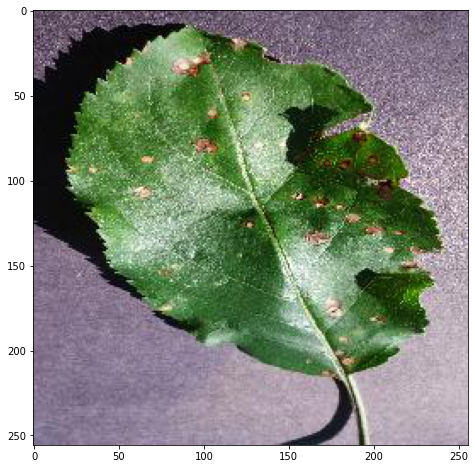

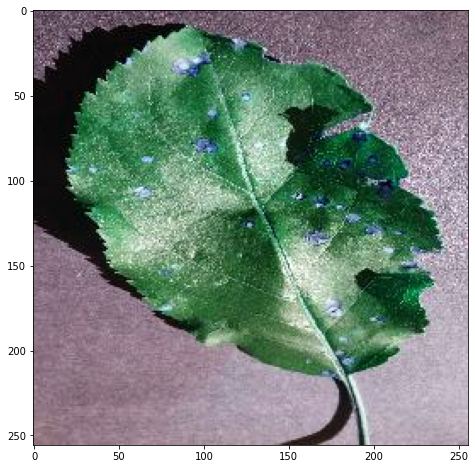

In [83]:
print(data.shape, image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(data)

plt.figure(figsize=(8, 8))
plt.imshow(image)

plt.show()

In [84]:
a=data[:,:,2]
a=255-a
thresh = cv2.threshold(a, 10, 255, cv2.THRESH_BINARY)[1]


In [85]:
low_threshold = 50
high_threshold = 150
kernel=5
edges = cv2.Canny(thresh, low_threshold, high_threshold,kernel)

In [86]:
rho = 1  
theta = np.pi / 180  
threshold = 10 
min_line_length = 100  
max_line_gap = 20 
line_image = np.copy(image) * 0  

In [87]:
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

    
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0)  

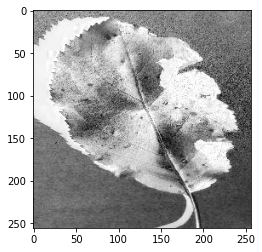

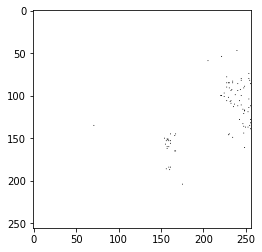

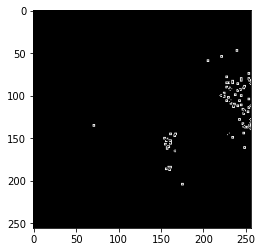

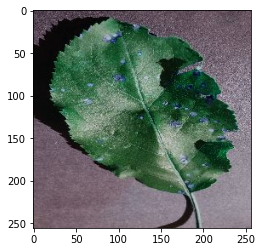

In [88]:
plt.figure()
plt.imshow(a,cmap='gray')
plt.figure()
plt.imshow(thresh,cmap='gray')
plt.figure()
plt.imshow(edges,cmap='gray')

plt.figure()
plt.imshow(lines_edges,cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa7d15d1fd0>,
 <matplotlib.image.AxesImage at 0x7fa7d1424450>)

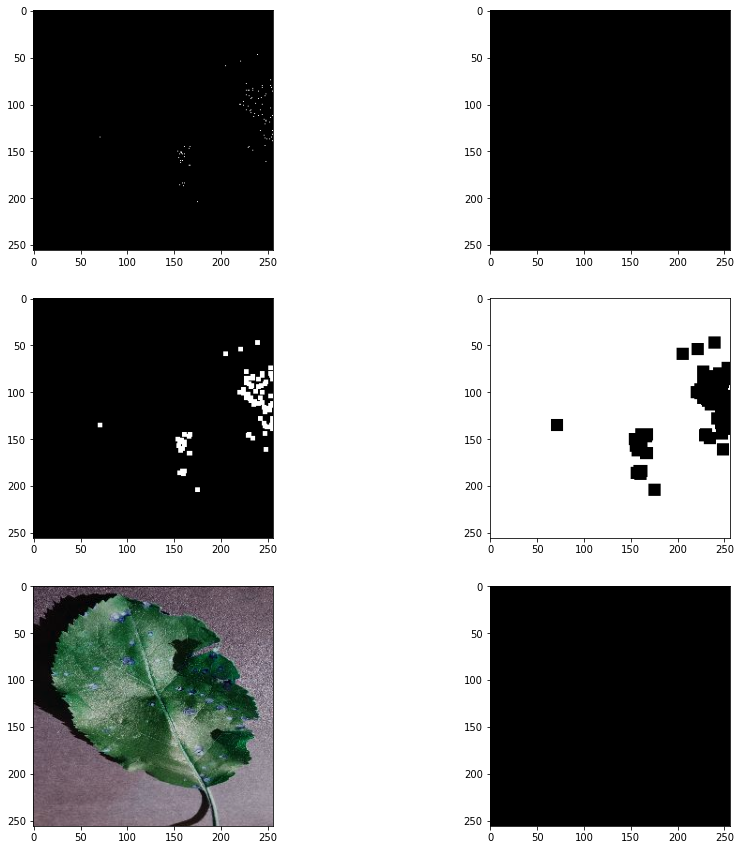

In [89]:
thresh = cv2.threshold(a, 10, 255, cv2.THRESH_BINARY_INV)[1]
im_floodfill = thresh.copy()
h, w = thresh.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill, mask, (0,0), 255);


final = np.multiply(255-thresh, im_floodfill)
line_image = np.copy(image) * 0
mask = 1 - final
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)
final = cv2.morphologyEx(final, cv2.MORPH_DILATE, kernel)
final = np.multiply(mask, final)

mask_dil = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)
mask_erd = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)
bound = mask_dil - mask_erd
bound = cv2.morphologyEx(bound, cv2.MORPH_DILATE, kernel)
bound = 1 - bound
final = np.multiply(bound, final)


# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(final, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)
  
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0)  


plt.figure(figsize=(15, 15))
plt.subplot(321), plt.imshow(thresh, cmap='gray')
plt.subplot(322), plt.imshow(im_floodfill, cmap='gray')
plt.subplot(323), plt.imshow(mask, cmap='gray')
plt.subplot(324), plt.imshow(bound, cmap='gray')
plt.subplot(325), plt.imshow(lines_edges, cmap='gray')
plt.subplot(326), plt.imshow(final, cmap='gray')